In [90]:
from datetime import datetime

import autograd.numpy as np
import capytaine as cpy
import matplotlib.pyplot as plt
from scipy.optimize import brute
import scipy

import wecopttool as wot
import xarray as xr

[0.00e+00 2.00e-02 4.00e-02 6.00e-02 8.00e-02 1.00e-01 1.20e-01 1.40e-01
 1.60e-01 1.80e-01 2.00e-01 2.20e-01 2.40e-01 2.60e-01 2.80e-01 3.00e-01
 3.20e-01 3.40e-01 3.60e-01 3.80e-01 4.00e-01 4.20e-01 4.40e-01 4.60e-01
 4.80e-01 5.00e-01 5.20e-01 5.40e-01 5.60e-01 5.80e-01 6.00e-01 6.20e-01
 6.40e-01 6.60e-01 6.80e-01 7.00e-01 1.14e+00 1.40e+00 1.72e+00 1.96e+00
 2.30e+00 2.82e+00 3.36e+00 4.46e+00 5.36e+00 1.60e+01 2.60e+01 5.00e+01
 1.00e+02]
[0.00000000e+00 6.14731689e-01 4.87343639e+00 1.61966831e+01
 3.75579232e+01 7.12766226e+01 1.18850509e+02 1.80841307e+02
 2.56880021e+02 3.45672778e+02 4.45253896e+02 5.52981287e+02
 6.66097122e+02 7.81488154e+02 8.96276012e+02 1.00810175e+03
 1.11420793e+03 1.21289424e+03 1.30278273e+03 1.38305152e+03
 1.45245747e+03 1.51047740e+03 1.55781027e+03 1.59417889e+03
 1.61976829e+03 1.63537458e+03 1.64142501e+03 1.63839576e+03
 1.62689400e+03 1.60798423e+03 1.58227449e+03 1.55007833e+03
 1.51248996e+03 1.47017665e+03 1.42394953e+03 1.37397095e+03
 3

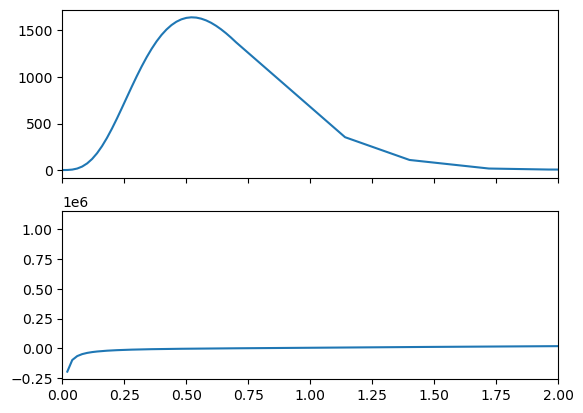

In [91]:


bem_low = xr.load_dataset('wavebot_bem_extracted_low_freqs.nc')
bem_high = xr.load_dataset('wavebot_bem_extracted_high_freqs.nc')

# set up the arrays for both real and imaginary
imag_freqs = np.concatenate((bem_low['imag_freqs'],bem_high['imag_freqs'][6:]))
imag_vals = np.concatenate((bem_low['Zi_imag'],bem_high['Zi_imag'][6:]))

real_freqs = np.concatenate((bem_low['real_freqs'],bem_high['real_freqs'][1:]))
real_vals = abs(np.concatenate((bem_low['Zi_real'],bem_high['Zi_real'][1:])))

fig, axs = plt.subplots(2, 1,sharex='all', sharey='row', squeeze=False)

axs[0,0].plot(real_freqs, real_vals)
axs[1,0].plot(imag_freqs, imag_vals)
axs[0,0].set_xlim([0,2])

print(real_freqs)
print(real_vals)

[0.0000e+00 1.0000e-03 2.0000e-03 ... 9.9998e+01 9.9999e+01 1.0000e+02]
[0.00e+00 2.00e-02 4.00e-02 6.00e-02 8.00e-02 1.00e-01 1.20e-01 1.40e-01
 1.60e-01 1.80e-01 2.00e-01 2.20e-01 2.40e-01 2.60e-01 2.80e-01 3.00e-01
 3.20e-01 3.40e-01 3.60e-01 3.80e-01 4.00e-01 4.20e-01 4.40e-01 4.60e-01
 4.80e-01 5.00e-01 5.20e-01 5.40e-01 5.60e-01 5.80e-01 6.00e-01 6.20e-01
 6.40e-01 6.60e-01 6.80e-01 7.00e-01 1.14e+00 1.40e+00 1.72e+00 1.96e+00
 2.30e+00 2.82e+00 3.36e+00 4.46e+00 5.36e+00 1.60e+01 2.60e+01 5.00e+01
 1.00e+02]
0.0
0
[0.         0.03073658 0.06147317 0.09220975 0.12294634 0.15368292
 0.18441951 0.21515609 0.24589268 0.27662926]


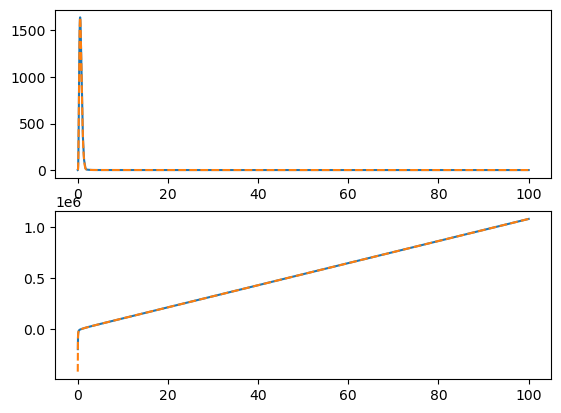

In [106]:
# make into equally spaced, interpolated vectors

cubic_real = scipy.interpolate.make_interp_spline(real_freqs, real_vals, k=3,axis=0)
cubic_imag = scipy.interpolate.make_interp_spline(imag_freqs, imag_vals, k=3,axis=0)
new_freqs = np.linspace(0,100,100001)
print(new_freqs)

Zi_real1 = cubic_real(new_freqs)
Zi_imag = cubic_imag(new_freqs)

print(real_freqs)


# from f = 3 on, use np.interp
Zi_real2 = np.interp(new_freqs,real_freqs,real_vals)
print(min(Zi_real2))

Zi_real = np.concatenate((Zi_real2[0:20],Zi_real1[20:5360],Zi_real2[5360:100001]))

fig, ax = plt.subplots(2)
ax[0].plot(real_freqs, real_vals)
ax[0].plot(new_freqs,Zi_real,'--')

ax[1].plot(imag_freqs, imag_vals)
ax[1].plot(new_freqs,Zi_imag,'--')
#ax[0].set_xlim([0,100])
#ax[0].set_ylim([-.5, 10])

res_ds = xr.Dataset(data_vars = dict(Zi_real=(['freqs'],Zi_real),Zi_imag=(['freqs'],Zi_imag)), coords=dict(freqs=new_freqs))
#res_ds.to_netcdf('wavebot_smooth_impedance.nc')
print(np.argmin(Zi_real))
print(Zi_real[0:10])